# 1 - Probabilidade e Amostragem com Python

Probabilidade é o estudo das chances de obtenção de cada resultado de um experimento aleatório. A essas chances são atribuídos os números reais do intervalo entre 0 e 1.

## 1.1 - Distribuição Binomial

Esta importante distribuição é aplicada em casos de experimentos repetidos, onde existem dois possíveis resultados: cara ou coroa, sucesso ou fracasso, item defeituoso ou item não defeituoso, e muitos outros possíveis pares. A probabilidade de cada resultado pode ser calculada utilizando a regra da multiplicação, talvez com o uso do diagrama de árvore, porém é muito mais simples e eficiente utilizar uma equação generalizada.

Assim, uma variável aleatória poderá ter sua distribuição de probabilidade modelada de forma binomial caso atenda os seguintes pressupostos:

- o resultado é completamente determinado por chance (aleatório);

- existem somente dois possíveis resultados, experimento Bernoulli;

- todas as tentativas possuem a mesma probabilidade para um resultado em particular. Ou seja, as tentativas ou realizações do experimento são independentes;

- isso implica que, existe uma probabilidade p de sucesso constante em cada tentativa

- o número de tentativas, n, é um valor fixo, um número inteiro e positivo;

<img src='https://imgur.com/dcI0Lcn.png'>

In [1]:
# Criando uma função para cálculo rápido de número de combinações
from math import factorial

comb = lambda n, x : factorial(n) / (factorial(x) * factorial(n - x))

prob_binom = lambda n, x, p : comb(n, x) * (p ** x) * ((1 - p) ** (n - x))

In [2]:
# Quantidade de jogos possíveis na mega-sena
comb(60, 6)

50063860.0

In [3]:
# Probabilidade de se ganhar na mega-sena
1 / comb(60, 6) * 100

1.997448858318156e-06

1) Suponha que uma fábrica produza 1000 lâmpadas e que 5% delas estejam com defeito. Qual é a probabilidade de que, ao escolhermos aleatoriamente 50 lâmpadas dessa fábrica, exatamente 3 estejam com defeito?

In [4]:
# 1) Resolução
prob_binom(n=50, x=3, p=0.05) * 100

21.98748382305844

2. Na prova de um concurso, temos um total de 10 questões de múltipla escolha com 3 alternativas cada. Cada questão tem o mesmo valor, e suporemos que um candidato fez o teste chutando todas as perguntas de forma aleatória, pois não estudou absolutamente nada.

    Assumindo que a prova vale 10 pontos e 5 seja a nota de corte, ou seja, uma nota maior a 5 significará aprovação e menor que 5 reprovação

In [6]:
# Importando funções mais eficientes que as criadas
from scipy.stats import binom

In [9]:
# Probabilidade do candidato acertar exatamente 5 questões
binom.pmf(5, 10, 1/3) * 100

13.656454808718161

In [10]:
# Probabilidade do  candidato ser aprovado
sum(binom.pmf([5, 6, 7, 8, 9, 10], 10, 1/3))

0.21312808006909492

In [11]:
# Probabilidade do  candidato ser aprovado
1 - binom.cdf(4, 10, 1/3)

0.21312808006909523

In [12]:
# Probabilidade do  candidato ser aprovado
binom.sf(4, 10, 1/3)

0.21312808006909525

3. Temos uma cidade do interior que realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última, a proporção de participantes do sexo feminino foi de 60% e o total foi de 30 equipes com 12 integrantes cada uma.

    Com as informações acima, deveremos responder quantas equipes são formadas por 8 mulheres.

In [13]:
# Quantidade de equipes formadas por 8 mulheres
round(binom.pmf(8, 12, 0.6) * 30)

6

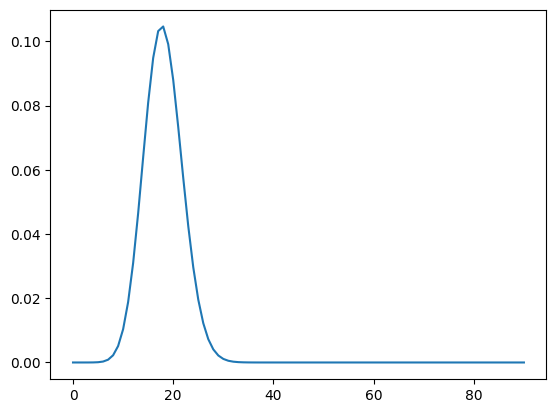

In [15]:
# Visualizando a probabilidade de acerto de questões no ENEM
import matplotlib.pyplot as plt

dist_binom = binom.pmf(range(0, 91, 1), 90, 1/5)

plt.plot(dist_binom)

## 1.2 - Distribuição Poisson

A distribuição de Poisson é uma distribuição discreta de probabilidade aplicável a ocorrências de um número de eventos em um intervalo específico.

Para reconhecer uma distribuição de Poisson, basta observar os três aspectos a seguir:

- O experimento calcula quantas vezes que um evento ocorre em um determinado intervalo de tempo, área, volume, etc;
- A probabilidade do evento ocorrer é a mesma para cada intervalo;
- O número de ocorrências de um intervalo é independente do outro.

<img src='https://images.prismic.io/voitto-blog/Mzc1YzYzNmQtMTM1Yy00YzRjLWExYzMtMzgzYTA2ZDQwMzQw_zrsuwxyqcti5ptj4whs0lgesau_7xyhvxmzfvajjgo_8uczl6tfu8vqbtzq7cer-veg5xdlvkdfknlnf_fvwszuedsiwxfrrvkwnctizglvsf4pdyaeag6mymvk6_uqxzzpspkci' width=25%>

1. Um restaurante recebe em média 10 pedidos de delivery por hora. Qual a probabilidade de receber exatamente 15 pedidos em um intervalo de 1 hora? Supondo que a distribuição de chegada dos pedidos seja Poisson.

In [16]:
# Importando módulo para trabalhar com distribuição poisson
from scipy.stats import poisson

In [18]:
# Probabilidade da questão 01
poisson.pmf(15, 10) * 100

3.4718069630684245

2. Um restaurante recebe, em média, 20 pedidos por hora. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba 15 pedidos?

In [20]:
# Probabilidade da questão 02
poisson.pmf(15, 20) * 100

5.164885353175814

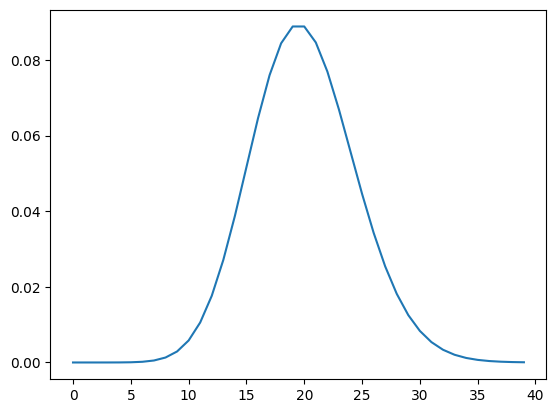

In [21]:
# Visualizando a distribuição Poisson

dist_poisson = poisson.pmf(range(0, 40), 20)

plt.plot(dist_poisson)

## 1.3 - Distribuição Normal

A distribuição normal, também conhecida como distribuição gaussiana, é uma curva simétrica em torno do seu ponto médio, apresentando assim seu famoso formato de sino.

Uma distribuição estatística é uma função que define uma curva, e a área sob essa curva determina a probabilidade de ocorrer o evento por ela correlacionado.

<img src='https://imgur.com/KbBQhbs.png'>

<img src='https://www.monolitonimbus.com.br/wp-content/uploads/2016/10/Standard_deviation_diagram.png' width=500px>

In [22]:
# Importando módulo para trabalhar com distribuição normal
import numpy as np

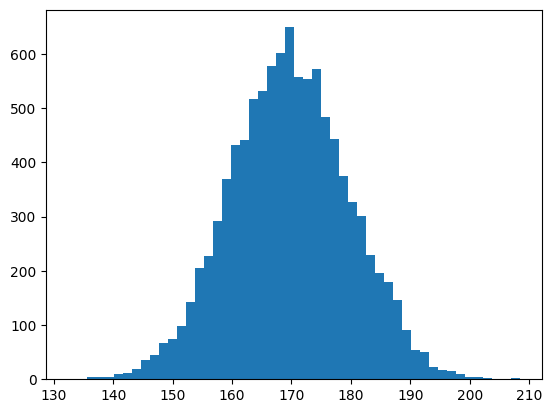

In [23]:
# Visualizando uma distribuição normal
dist_normal = np.random.normal(loc=170, scale=10, size=10000)

plt.hist(dist_normal, bins=50)

plt.show()

In [26]:
# Probabilidade de alguém ter menos de 180cm de altura
from scipy.stats import norm

Z = (180 - 170) / 10

norm.cdf(Z)

0.8413447460685429

In [32]:
# Probabilidade de alguém ter menos de 160cm de altura
from scipy.stats import norm

Z = (160 - 170) / 10

norm.cdf(Z)

0.15865525393145707

In [33]:
# Probabilidade de alguém ter entre 160cm e 180cm de altura
from scipy.stats import norm

Z1 = (180 - 170) / 10
Z2 = (160 - 170) / 10

norm.cdf(Z1 - Z2)

0.9772498680518208

## 1.4 - Amostragem

pequena porção de alguma coisa dada para ver, provar ou analisar, a fim de que a qualidade do todo possa ser avaliada ou julgada.

<img src='https://1.bp.blogspot.com/-sYM3vDns3_A/XxjLoxLL1bI/AAAAAAAAALs/ztrUyo5p_YwIHvMWvtDMYYamZegfxpLlQCLcBGAsYHQ/s1600/foto%2B1.png'>

In [36]:
import pandas as pd

In [37]:
dataset = pd.read_csv('/home/joeldspy/Modelos/datasets/dataset.csv'); dataset.head()

,estado,sexo,idade,cor,anos_de_estudo,renda,altura
0,SP,Masculino,23,Parda,11 anos,800,160.380762
1,SP,Feminino,23,Branca,11 anos,1150,173.978983
2,SP,Feminino,35,Parda,14 anos,880,176.044382
3,SP,Masculino,46,Branca,5 anos,3500,178.315794
4,SP,Feminino,47,Parda,8 anos,150,169.063095


In [43]:
dataset.shape[0]

76840

In [44]:
# Aplicando uma amostra aleatória simples
amostra_de_rendas = dataset['renda'].sample(100); amostra_de_rendas

36864    2500
73249    2300
52092    5000
34910    3000
39848     789
         ... 
63443    4000
32638    2500
30888     240
22495     788
49192    1800
Name: renda, Length: 100, dtype: int64

In [45]:
# A média da amostra em comparação com a média da população
abs(amostra_de_rendas.mean() - dataset['renda'].mean())

283.05680114523693

## 1.5 - Estimação

Estatísticas de estimativa, ou simplesmente estimativa, é uma estrutura de análise de dados que usa uma combinação de tamanhos de efeito, intervalos de confiança, planejamento de precisão e meta-análise para planejar experimentos, analisar dados e interpretar resultados.

### 1.5.1 - Teorema do Limite Central

O Teorema Central do Limite (TCL) afirma que a soma (S) de N variáveis aleatórias independentes (X), com qualquer distribuição e variâncias semelhantes, é uma variável com distribuição que se aproxima da distribuição de Gauss (distribuição normal) quando N aumenta.

In [46]:
# Criando um dataframe com N número de amostras
import warnings

warnings.filterwarnings('ignore')

amostras = pd.DataFrame()

for i in range(1500):
    _ = dataset.renda.sample(2000)
    _.index = range(2000)
    amostras['amostra_' + str(i)] = _

In [47]:
amostras.head(10)

,amostra_0,amostra_1,amostra_2,amostra_3,amostra_4,amostra_5,amostra_6,amostra_7,amostra_8,amostra_9,...,amostra_1490,amostra_1491,amostra_1492,amostra_1493,amostra_1494,amostra_1495,amostra_1496,amostra_1497,amostra_1498,amostra_1499
0,2000,1100,800,700,1200,1200,3300,1200,5000,1300,...,4000,780,2300,5000,0,797,4000,900,788,300
1,3200,1400,1200,2300,2000,1400,1200,3000,1100,788,...,150,2100,0,4000,788,788,1600,2000,820,5000
2,788,5000,1000,1250,788,1800,1700,1000,1000,1150,...,3000,788,7200,2400,600,600,1500,1200,788,150
3,2500,250,1800,1900,788,200,1576,1800,0,850,...,5800,1300,1200,3000,400,2000,2600,700,300,1200
4,2500,788,2000,0,2000,1200,1600,1500,4200,788,...,1800,1000,1900,0,600,1200,700,500,2000,800
5,1500,400,5000,788,3500,2000,3500,1560,950,5000,...,150,600,788,2000,1400,800,100,2400,3200,2200
6,6000,500,788,4500,700,2000,200,500,800,1500,...,2500,8000,1500,900,788,6500,800,5000,3000,450
7,1400,400,0,1500,2200,15000,1200,275,788,900,...,1500,1300,1500,3000,2500,4000,1552,7000,300,788
8,1500,500,788,2600,788,788,3000,2500,800,788,...,1000,3000,3500,1300,4000,1032,600,2500,3000,10000
9,5500,1400,800,2120,800,1200,800,1576,5000,1150,...,1300,788,800,3000,300,70,15000,200,1500,200


<AxesSubplot: >

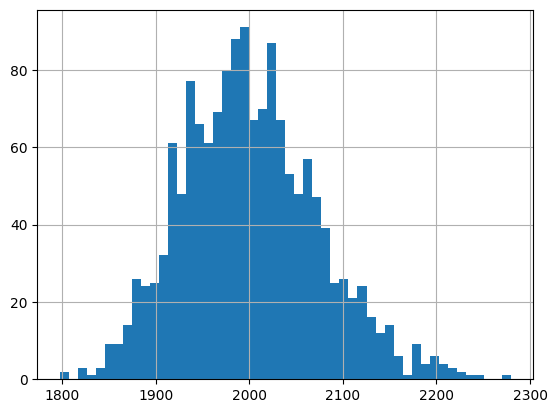

In [48]:
# Visualizando o teorema do limite central
amostras.mean().hist(bins=50)

### 1.5.2 Níveis de Confiança

<img src='https://slideplayer.com.br/slide/288421/1/images/40/95%25+Dispers%C3%A3o+Tamanho+1%2C96+da+amostra+N%C3%ADvel+de+confian%C3%A7a+Fun%C3%A7%C3%A3o+de+....jpg' width=400px>

In [49]:
# Encontrando a área sobre a curva
0.5 + 0.475

0.975

In [50]:
# Visualizando o nosso Z
z = norm.ppf(0.975); z

1.959963984540054

1) Supondo que os pesos do saco de arroz de uma indústria alimentícia se distribuem aproximadamente como uma Normal, e seu desvio padrão populacional é igual a 150 gramas. Selecionada uma amostra aleatória de 20 sacos de um lote específico, obteve-se peso médio de 5 mil e 50 gramas.

In [51]:
media_da_amostra = 5050
desvio_padrao = 150
raiz_de_n = np.sqrt(20)
z = 1.96
sigma = desvio_padrao / raiz_de_n

e = z * sigma

In [55]:
# Cálculando o intervalo de confiança
intervalo = (media_da_amostra - e, media_da_amostra + e)

intervalo

(4984.2596014615065, 5115.7403985384935)

In [57]:
# Cálculando o intervalo de confiança
norm.interval(alpha = 0.95, loc = media_da_amostra, scale = sigma)

(4984.260809456757, 5115.739190543243)

## 1.6 - Cálculo do Tamanho da Amostra

para populações infinitas

<img src='https://imgur.com/QsYYlmT.png'>

Sabemos que o Desvio Padrão Populacional desse grupo de trabalhadores é de 3.323,39 reais para um nível de confiança de 95%, e deveremos descobrir qual o tamanho da amostra de nosso estudo.

In [58]:
s = 3323.39
z = 1.96
e = 100

n = (z * (s / e)) ** 2

n

4243.016886741135